# **STINTSY Machine Learning Project: Pumpkin Seeds Dataset**

**STINTSY S11 - Milky Way** \
*Group Members:*
- Gutierrez, Mark Daniel
- Refuerzo, Lloyd Dominic
- Romblon, Kathleen Mae
- Stinson, Audrey Lauren

## **1** | **Introduction**

The pumpkin plant belongs to the Cucurbitaceae family and has seasonal varieties. Confectionery pumpkins, grown in Turkey, are usually produced from the pumpkin species, Cucurbita pepo L and sometimes from the Cucurbita moschata Duchesne type. Pumpkin seeds are considered as important for human health because it contains 37 percent of carbohydrate, 35 percent to 40 percent of fat and protein along with calcium, potassium, phosphorus, magnesium, iron, and zinc. Pumpkins are divided into many types, and one of these species is known as “Urgup Sivrisi”. Urgup Sivrisi is a type of pumpkin seed that has a long, white, very bright, thin, and hardly distinguishable shell with a pointed tip. The other type of pumpkin seeds is “Cercevelik”. It is a particular species grown in Turkey, Nevsehir, Karacaoren, and known as “Topak” in Turkey. <span style="color:#42adf5">(*taken directly from* Details *section of the Pumpkin Seeds Dataset pdf*)</span>

The target task for this dataset is to correctly classify whether an image of a pumpkin seed is of the species type "Urgup Sivrisi" or "Cercevelik". The dataset then offers a <span style="color:#f5b942">classification problem</span> that the group will address through the use of various machine learning models, namely **k-Nearest Neighbors**, **Decision Trees**, and **Convolutional Neural Networks (CNNs) / Logistic Regression**. <span style="color:red">(note/to delete/todo: pick between logreg and cnns)</span>

## **2** | **About the Dataset**

## **3** | **List of Requirements**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

The following list is the requirements needed to run the notebook:

## **4** | **Data Preprocessing**

Let's take a look in our dataset

In [2]:
# import dataset
df = pd.read_csv('pumpkin_seeds.csv')
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


There are 13 columns and the first 12 columns are the input features and the last column is the target/label. Total of instances are 2500. The shape of the dataset is (2500, 13).

We can see the statistical summary of the dataset by calling <b>describe()</b>.

In [3]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


We can see the data type, whether containing null value or not, number of records from <b>info()</b>. And note that Class is non-numerical data, in order to use the data for analysis and classification later, we encode it into numerical type:

In [5]:
# Transform non-numerical data into numerical ones for later processing
labelEncoder = LabelEncoder()
labelEncoder.fit(df.Class.drop_duplicates()) 

# 0: Çerçevelik 1: Ürgüp Sivrisi
df.Class = labelEncoder.transform(df.Class) 

After transformation, the Class was encoded into 0 (Çerçevelik) and 1 (Ürgüp Sivrisi). You can see by displaying the table again.

In [6]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


In [7]:
df.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,1
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,1
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,1
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1
2499,84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,1


There's also a slight typographical error for the <b>"Aspect_Ration"</b> feature. Let's fix that.

In [8]:
#renaming and reformatting the features
df.columns = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter',
                'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ratio', 'Compactness', 'Class']

# print all columns
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ratio', 'Compactness', 'Class'],
      dtype='object')

Let's split the features and the Label apart. Also, we'll be applying normalization on the data.

In [9]:
# df.hist(figsize=(12,12))
# plt.show()

#split features and label
X = df.drop(columns=['Class']).values
y = df['Class'].values

#normalize
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## **5** | **Exploratory Data Analysis**

### Correlation Checking

Let’s play around with the data and find association among them. First, we check the correlation between features and labels.

In [10]:
df.corr()['Class'].sort_values()

Compactness         -0.726676
Roundness           -0.669514
Minor_Axis_Length   -0.401362
Extent              -0.236076
Solidity             0.122674
Equiv_Diameter       0.160303
Convex_Area          0.168029
Area                 0.170280
Perimeter            0.388345
Major_Axis_Length    0.561458
Eccentricity         0.699319
Aspect_Ratio         0.721796
Class                1.000000
Name: Class, dtype: float64

As shown above, the first four features who has strongest relationship with Class are <b>Aspect_Ratio, Eccentricity, Major_Axis_Length and Perimeter</b>.

Then we display the correlations of each combination of two features.

<Axes: >

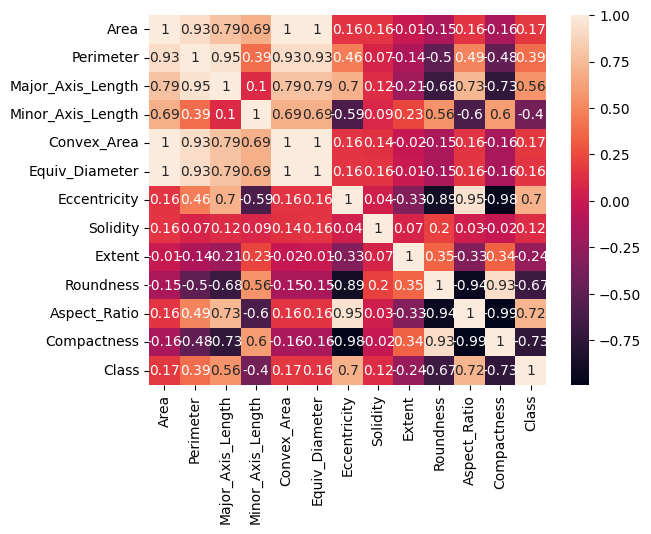

In [11]:
corr = df.corr().round(2)
sns.heatmap(corr,cmap="rocket",annot=True)

The brighter the color is, the stronger the relationship between 2 variables. And let’s plot some interesting pattern.

### The number of data in each class

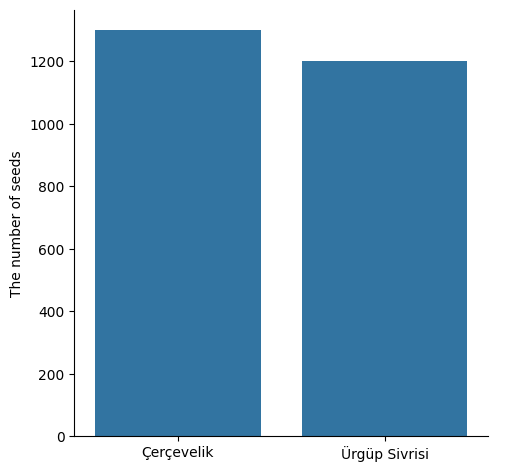

In [12]:
g = sns.catplot(data=df,x='Class',kind='count')
g.set_axis_labels("", "The number of seeds")
g.set_xticklabels(["Çerçevelik", "Ürgüp Sivrisi"])

We can see that in the dataset, The number of Çerçevelik seeds is slightly more than that of Ürgüp Sivrisi.

### Boxplot

We display the relationship between Class and the first four features who has strongest relationship with it.

/tmp/ipykernel_29695/1844984887.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(["Çerçevelik", "Ürgüp Sivrisi"])
/tmp/ipykernel_29695/1844984887.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(["Çerçevelik", "Ürgüp Sivrisi"])
/tmp/ipykernel_29695/1844984887.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c.set_xticklabels(["Çerçevelik", "Ürgüp Sivrisi"])
/tmp/ipykernel_29695/1844984887.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d.set_xticklabels(["Çerçevelik", "Ürgüp Sivrisi"])


[Text(0, 0, 'Çerçevelik'), Text(1, 0, 'Ürgüp Sivrisi')]

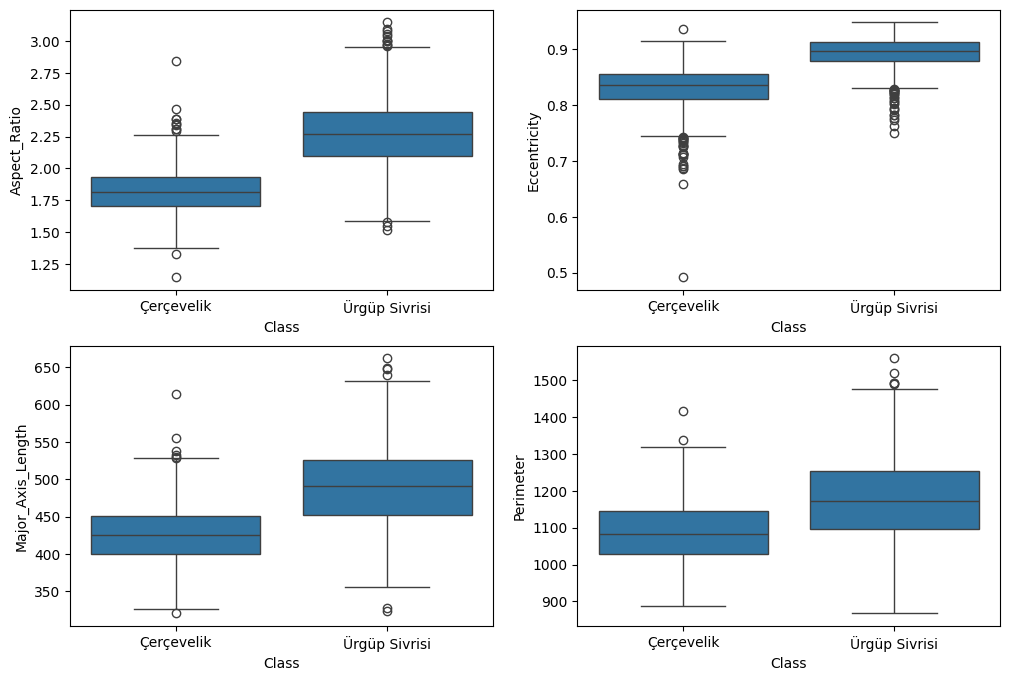

In [13]:
# Boxplot
f = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
# Aspect_Ration vs Class
a=sns.boxplot(data=df,x='Class',y='Aspect_Ratio')
a.set_xticklabels(["Çerçevelik", "Ürgüp Sivrisi"])

plt.subplot(2,2,2)
# Eccentricity vs Class
b=sns.boxplot(data=df,x='Class',y='Eccentricity')
b.set_xticklabels(["Çerçevelik", "Ürgüp Sivrisi"])

plt.subplot(2,2,3)
# Major_Axis_Length vs Class
c=sns.boxplot(data=df,x='Class',y='Major_Axis_Length')
c.set_xticklabels(["Çerçevelik", "Ürgüp Sivrisi"])

plt.subplot(2,2,4)
# Perimeter vs Class
d=sns.boxplot(data=df,x='Class',y='Perimeter')
d.set_xticklabels(["Çerçevelik", "Ürgüp Sivrisi"])

It is very obvious and clear to tell the different distribution of two different class.

### Scatterplot

As we can see from the correlation plot, some other combinations of the variables also show strong relationships (around 0.95). Let’s have a look at the four of them.

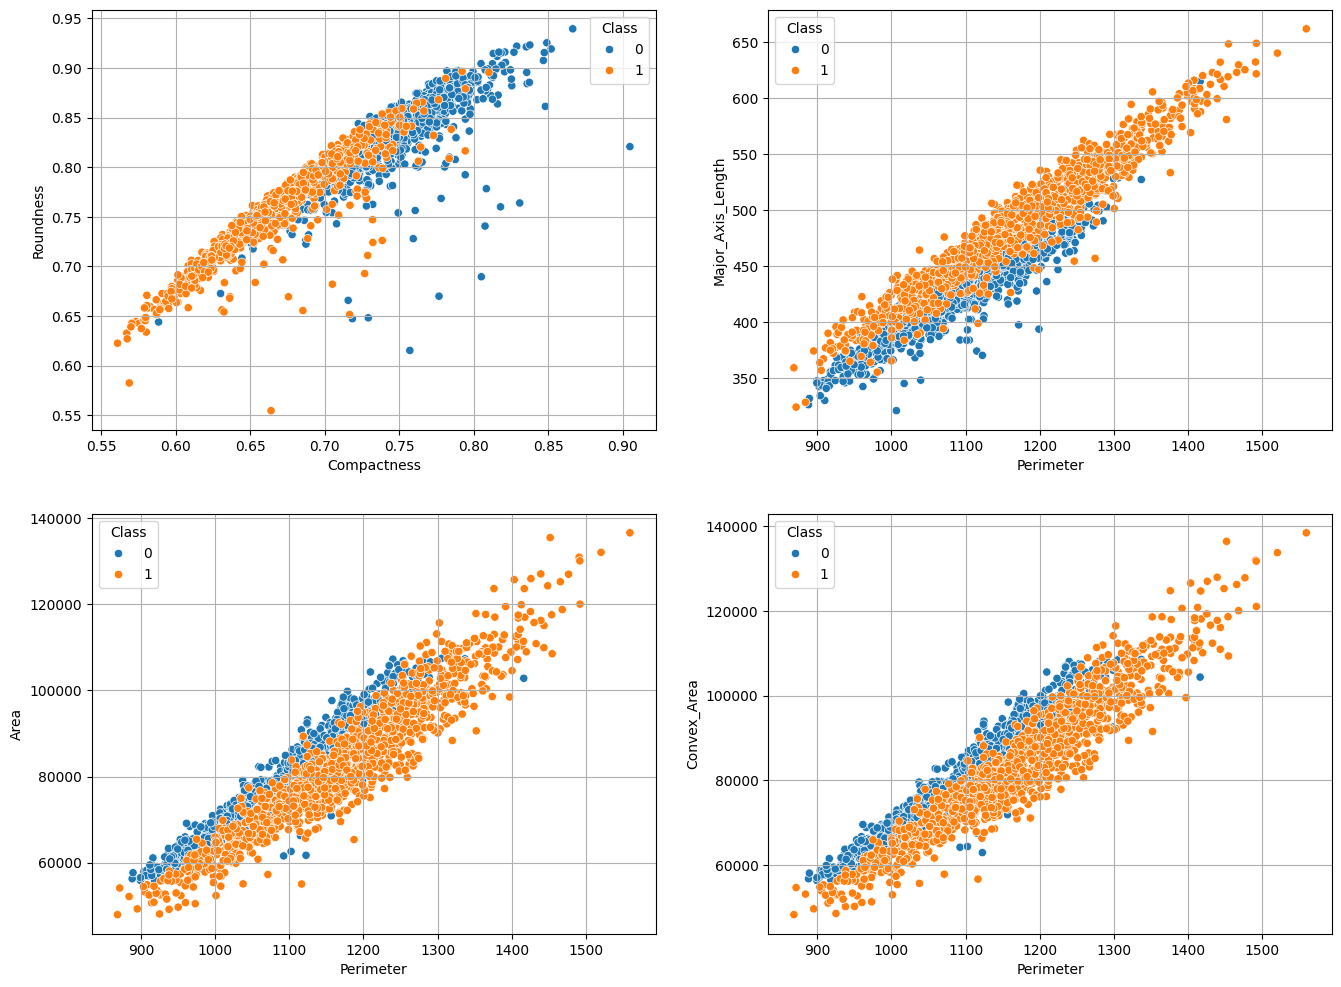

In [14]:
#The relationships among other features
f = plt.figure(figsize=(16,12))
#Roundness vs. Compactness
plt.subplot(2,2,1)
sns.scatterplot(data=df,x='Compactness', y='Roundness',hue='Class')
plt.grid()

#Perimeter vs. Major_Axis_Length
plt.subplot(2,2,2)
sns.scatterplot(data=df,x='Perimeter', y='Major_Axis_Length',hue='Class')
plt.grid()

#Perimeter vs. Area
plt.subplot(2,2,3)
sns.scatterplot(data=df,x='Perimeter', y='Area',hue='Class')
plt.grid()

#Perimeter vs. Convex_Area
plt.subplot(2,2,4)
sns.scatterplot(data=df,x='Perimeter', y='Convex_Area',hue='Class')
plt.grid()

The scatterplot is divided according to their class. As you can see two features got very strong relationships. While they don’t have strong relationships with **Class**, which can be seen from the distribution of orange and blue points, representing two different seed classes. The distribution of two classes doesn’t appear like cluster.

## **6** | **Initial Model Training**

## **7** | **Error Analysis**

## **8** | **Improving Model Performance**

## **9** | **Model Performance Summary**

## **10** | **Insights and Conclusions**

## **11** | **References**